# <center> TensorFlow </center>
## <center>2.1 MNIST with TensorFlow</center>

# Explanation

In this section, we will show you how you can do digit classification with Tensor on MNIST database with a few lines of code. 

In the subsequent notebooks we shall disect the parts of the code to analyze in greater detail how the digit classification with MNIST is working. 

# Code

In [1]:
import argparse
import sys
import tensorflow
FLAGS = None

parser = argparse.ArgumentParser()
parser.add_argument('--data_dir', type=str, default='/tmp/tensorflow/mnist/input_data',
                    help='Directory for storing input data')
FLAGS, unparsed = parser.parse_known_args()

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(FLAGS.data_dir, one_hot=True)
import matplotlib.pyplot as plt
import numpy as np
import random as ran

Extracting /tmp/tensorflow/mnist/input_data\train-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\train-labels-idx1-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting /tmp/tensorflow/mnist/input_data\t10k-labels-idx1-ubyte.gz


In [3]:
def TRAIN_SIZE(num):
    print ('Total Training Images in Dataset = ' + str(mnist.train.images.shape))
    print ('--------------------------------------------------')
    x_train = mnist.train.images[:num,:]
    print ('x_train Examples Loaded = ' + str(x_train.shape))
    y_train = mnist.train.labels[:num,:]
    print ('y_train Examples Loaded = ' + str(y_train.shape))
    print('')
    return x_train, y_train

def TEST_SIZE(num):
    print ('Total Test Examples in Dataset = ' + str(mnist.test.images.shape))
    print ('--------------------------------------------------')
    x_test = mnist.test.images[:num,:]
    print ('x_test Examples Loaded = ' + str(x_test.shape))
    y_test = mnist.test.labels[:num,:]
    print ('y_test Examples Loaded = ' + str(y_test.shape))
    return x_test, y_test

def display_digit(num):
    print(y_train[num])
    label = y_train[num].argmax(axis=0)
    image = x_train[num].reshape([28,28])
    plt.title('Example: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()

def display_mult_flat(start, stop):
    images = x_train[start].reshape([1,784])
    for i in range(start+1,stop):
        images = np.concatenate((images, x_train[i].reshape([1,784])))
    plt.imshow(images, cmap=plt.get_cmap('gray_r'))
    plt.show()

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (55000, 784)
y_train Examples Loaded = (55000, 10)

[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]


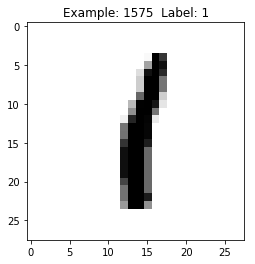

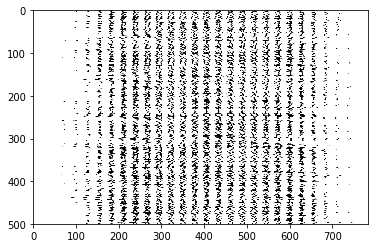

In [4]:
x_train, y_train = TRAIN_SIZE(55000)
display_digit(ran.randint(0, x_train.shape[0]))
display_mult_flat(0,500)

In [5]:
import tensorflow as tf
sess = tf.Session()

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,W) + b)

x_train, y_train = TRAIN_SIZE(3)
sess.run(tf.global_variables_initializer())
#If using TensorFlow prior to 0.12 use:
#sess.run(tf.initialize_all_variables())
print(sess.run(y, feed_dict={x: x_train}))

cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

x_train, y_train = TRAIN_SIZE(5500)
x_test, y_test = TEST_SIZE(10000)
LEARNING_RATE = 0.1
TRAIN_STEPS = 2500

init = tf.global_variables_initializer()
sess.run(init)

training = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

for i in range(TRAIN_STEPS+1):
    sess.run(training, feed_dict={x: x_train, y_: y_train})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: x_test, y_: y_test})) + '  Loss = ' + str(sess.run(cross_entropy, {x: x_train, y_: y_train})))

Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (3, 784)
y_train Examples Loaded = (3, 10)

[[ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]
 [ 0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1]]
Total Training Images in Dataset = (55000, 784)
--------------------------------------------------
x_train Examples Loaded = (5500, 784)
y_train Examples Loaded = (5500, 10)

Total Test Examples in Dataset = (10000, 784)
--------------------------------------------------
x_test Examples Loaded = (10000, 784)
y_test Examples Loaded = (10000, 10)
Training Step:0  Accuracy =  0.5988  Loss = 2.1882
Training Step:100  Accuracy =  0.8647  Loss = 0.580297
Training Step:200  Accuracy =  0.879  Loss = 0.459822
Training Step:300  Accuracy =  0.8866  Loss = 0.408572
Training Step:400  Accuracy =  0.8904  Loss = 0.378081


KeyboardInterrupt: 

# Summary

In this section, we can see the corresponding code in tensorflow for digit classification in MNIST database. Comparing the code with keras implementation, it becomes clear that tensorflow gives more control to the user but also much more knowledge is required to wire up everything correctly. 

#  Task

Run the code in this notebook and notedown your accuracy.

# Feedback
<a href = "http://goto/ml101_doc/Tensorflow01">Feedback: MNIST with Tensorflow</a> <br>

# Navigation
<br>

<div>
<span> <h3 style="display:inline">&lt;&lt; Prev: <a href = "../Table_Of_Contents.ipynb">Table of Contents</a></h3> </span>
<span style="float: right"><h3 style="display:inline">Next: <a href = "tensorflow02.ipynb">Structure</a> &gt;&gt; </h3></span>
</div>